### Aprendizagem Automática Avançada - Assignment 1 - by Martim Silva 51304 and Alexandre Sobreira 59451


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, recall_score 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 4

 - Functions

In [ ]:
def margin_plot(model):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=50)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.2)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')

    # Calculate the margin size based on the support vectors
    w_norm = np.linalg.norm(model.coef_)
    margin = 1.0 / w_norm

    plt.title("Polynomial SVM with " + str(len(model.support_vectors_)) + " support vectors\nMargin size: " + str(round(margin, 3)))
    plt.show()


def svm_plot(model, f):
    #plt.subplot(1, 2, 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with ' + f + ' kernel')
    plt.show()

 - Data

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
print(X.shape)
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
print(y.shape)

(150, 2)
(150,)



## 4.1


 - Our assumption is that if support vectors are removed this means that the decision boundary would be reduced given than less point would be "allowed" inside it, being the extreme case where no slack is allowed and all the support vector lie along the margin. On the other hand by allowing more support vectors, this would generate a wider margin, bigger error, but also improve generalization and allow to find separation of data that isn't linearly separable.

## 4.2 


### All Support Vectors

In [ ]:
svc = svm.SVC(kernel='poly').fit(X, y)

### Removed Support Vectors
 - We will remove the 20 first support vectors

In [ ]:
support_indices = svc.support_
support_indices[:20]

reduced_X = np.delete(X, support_indices[:20], axis=0)
reduced_y = np.delete(y, support_indices[:20])

svc_reduced = svm.SVC(kernel='poly').fit(reduced_X, reduced_y)

### Lets Plot it

In [ ]:
# grid creation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

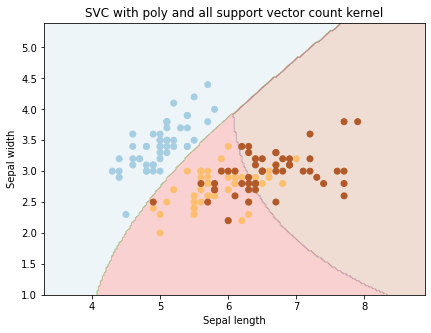

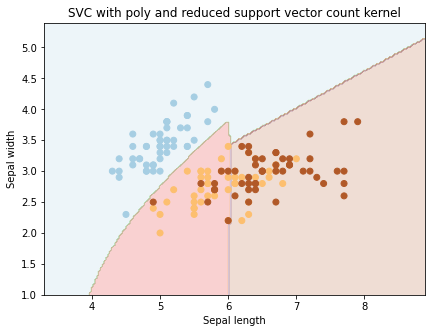

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
svm_plot(svc , "poly and all support vector count")
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 2)
svm_plot(svc_reduced, "poly and reduced support vector count")
plt.show()

- Reducing the number of support vectors also generated a very pronounced change specifically in the curve separating the classes denoting flowers that are of the species virginica and of versicolor.


## Margin size Viz with linear and 2 classes



- In order to obtain the the margin size using "model.coef_" we needed to use a support vector machine with linear kernel.

- Given that the above plots weren't very indicative of whatsw actually happening with the margins we decided to have a better understanding of what is happening to the margins we decided to fit a model to separate only 2 classes.

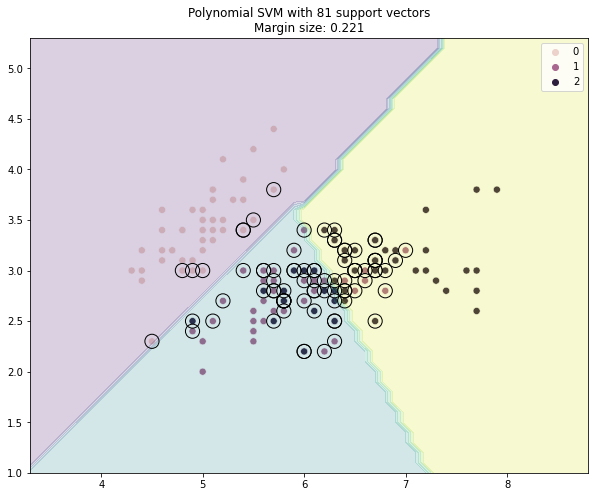

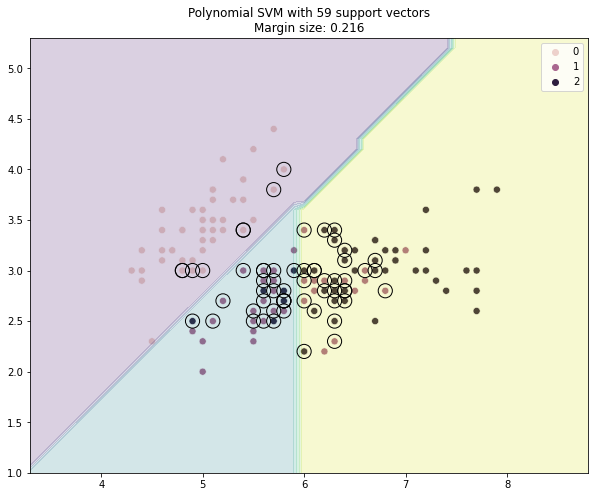

In [ ]:
# train models
svc = svm.SVC(kernel='linear').fit(X, y)
svc_reduced = svm.SVC(kernel='linear').fit(reduced_X, reduced_y)
#Plot
margin_plot(svc)
margin_plot(svc_reduced)

## Final Discussion

 - As we expected the length of the margin is reduced when a few support vectors were removed and also worth noting that less values fall inside the margin which translates to achieving less error but with the tradeoff of the model having a reduced capability to generalize (overfitting). 

# 5

In [ ]:
def report (y_test, preds):
    stats = pd.DataFrame()  
    #since the target for this proble is a multiclass one (not binary)
    # the average parameter for the calculation of these scores was replaced with
    #the micro value which regards: 
    #"Calculate metrics globally by counting the total true positives, false negatives and false positives."
    stats['Precision'] = [precision_score(y_test, preds, average='micro')] 
    stats['Recall'] = [recall_score(y_test, preds, average='micro')]
    stats['F1'] = [f1_score(y_test, preds, average='micro')]
    stats['Matthews'] = [matthews_corrcoef(y_test, preds)]
    display(stats)

 - Data

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

#train-test split + IVS
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y_TRAIN, test_size=0.2, random_state=22)

 - Grid Search

In [ ]:
#Using grid search
c_p = [1000, 100, 10, 1, 0.5, 1e-1, 0.05, 1e-2, 1e-3, 1e-5]
gamma_p = [1000, 100, 10, "scale", "auto", 1, 0.5, 1e-1, 0.05, 1e-2, 1e-3, 1e-5]
param_grid = {"C": c_p, "gamma": gamma_p}

#since in the question it is not specified if more hyperparameters are to be optimized
#the remaining ones (all except for C and gamma will be left as their default value
#including the kernel as rbf)

svc = svm.SVC()

#default cv parameter value is 5
gs_svc = GridSearchCV(estimator = svc, param_grid = param_grid, scoring="accuracy").fit(X_train, y_train)

print("Best parameters for SVC:", gs_svc.best_params_)

Best parameters for SVC: {'C': 1000, 'gamma': 0.001}


 - The default kernel (rbf) will be maintained as no indication of varying the kernel used was provided.
 

## Optimized Model

In [ ]:
# Retrieving the best estimator model prediction statistics
preds = gs_svc.best_estimator_.predict(X_test)

# calculation of scores
print(report(y_test, preds))

,Precision,Recall,F1,Matthews
0,0.708333,0.708333,0.708333,0.576166


None


 - IVS

In [ ]:
#Training and testing model with optimal combination of hyperparameters with IVS
best_svc = svm.SVC(C=1000, gamma=0.001)
best_svc.fit(X_TRAIN, y_TRAIN)
ivs_preds = best_svc.predict(X_IVS)
print(report(y_IVS, ivs_preds))

,Precision,Recall,F1,Matthews
0,0.866667,0.866667,0.866667,0.820089


None


## Default Model

- Default values: C = 1.0 gama = 1 / (n_features * X.var())

 - IVS

In [ ]:
#Comparing these metrics with the ones produced by model with default hyperparameter values
default_svc =svm.SVC()
default_svc.fit(X_TRAIN, y_TRAIN)
ivs_default_preds = default_svc.predict(X_IVS)
print(report(y_IVS, ivs_default_preds))

,Precision,Recall,F1,Matthews
0,0.833333,0.833333,0.833333,0.78223


None


## Discussion

These results indicate that holding a care of optimizing the choice of hyperparameters with cross validation checks for our model will generally yield better models when compared to running versions of those models without any tuning whatsoever.

# 6

 - Data division into X and y 

In [ ]:
points = pd.read_csv("points.csv", on_bad_lines="skip", delimiter=",")

X = points.iloc[:,:2]

points['color'].replace({'Blue': 1, 'Red': 0}, inplace = True)
label = points.iloc[:,2:]

 - Data Viz

<function matplotlib.pyplot.show(close=None, block=None)>

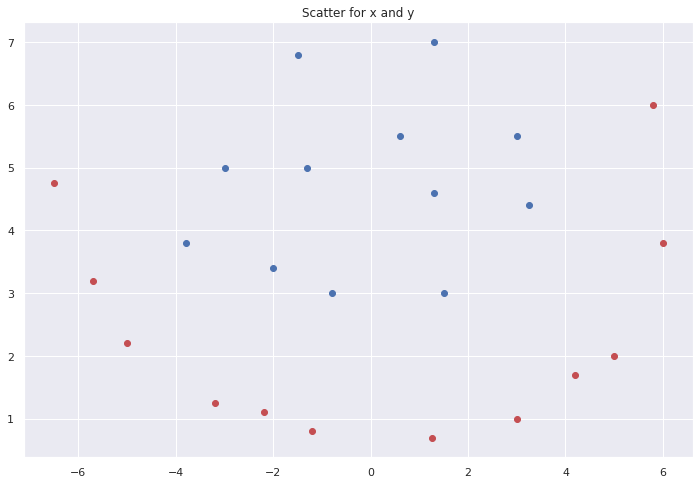

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
for i in range(len(points.index)):
  if points["color"][i]==0:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["y"], marker = "o", c = "r")
  else:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["y"], marker = "o", c = "b")
plt.title("Scatter for x and y" )
plt.show

# 6.1
## New feature

Lets try to find the aditional feature (z) to have a hyper-plane that separates the classes\
This will be a function z=(x,y) implemented in such a way that through the increase in dimensions from x and y to x, y and z we are thus able to linearly separate the red from the blue dots.

 - Given that Logarithms tend to contribute when handling data of a non-linear nature we decided to try applying it to the y variable. 

In [ ]:
x = points["x"]
y = points["y"]
#z = x- 1/(1 + np.exp(-y))
z = 3*x - np.log(y)
points["z"] = z

### 2D Viz x and z

<function matplotlib.pyplot.show(close=None, block=None)>

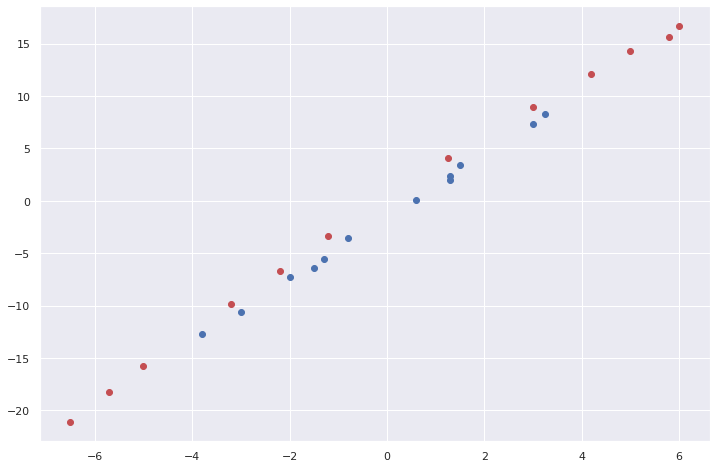

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
for i in range(len(points.index)):
  if points["color"][i]==0:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["z"], marker = "o", c = "r")
  else:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["z"], marker = "o", c = "b")

plt.show

 - In terms of the additional feature, through trial and error we observed that the log was better suited if applied to the y and would work well when subtracted from 3*x.

### The Hyperplane

 - In order to draw a hyperplane we will fit a linear svm to the new transformed data.
  - A new X will be created and the target variable will be tranformed into 0(blue) or 1(red).

In [ ]:
new_x = points[["x", "z"]]

 - Lets fit the model

In [ ]:
svc = svm.SVC(kernel='linear').fit(new_x, label) # with default parameters 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 - Hyperplane Viz

In [ ]:
# Grid
new_x = np.array(new_x)
x_min, x_max = new_x[:, 0].min() - 1, new_x[:, 0].max() + 1
y_min, y_max = new_x[:, 1].min() - 1, new_x[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


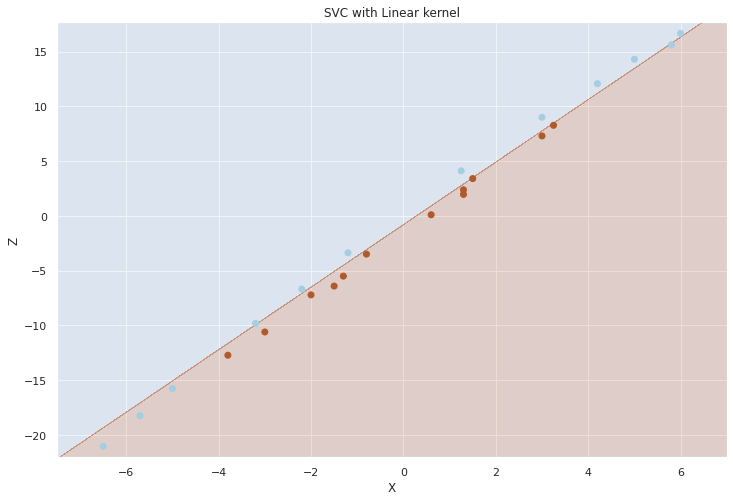

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["z"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Z')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()


- Even if 4 blues are miss classified the new feature enabled a linear separation as previously mentioned.

# 6.2
### 3D Viz

In [ ]:
fig = px.scatter_3d( x=x, y=y,z=z,color = points['color'])
fig.show()

 - When plotting all three features above it would appear that the data is linearly separable to a certain degree.
 - To conclude the designed additional feature still has a lot of room for improvement for separating the classes.
 - Through the usage of different kernel functions it is expected better separations can be discovered. 

# 6.3
## Comparison with scikit-learn classifiers

In [ ]:
points = pd.read_csv("points.csv", on_bad_lines="skip", delimiter=",")
points['color'].replace({'Blue': 1, 'Red': 0}, inplace = True)

X = points.iloc[:,:2]
label = points.iloc[:,2:]

In [ ]:
# Grid
X = np.array(X)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

### linear - default parameters

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



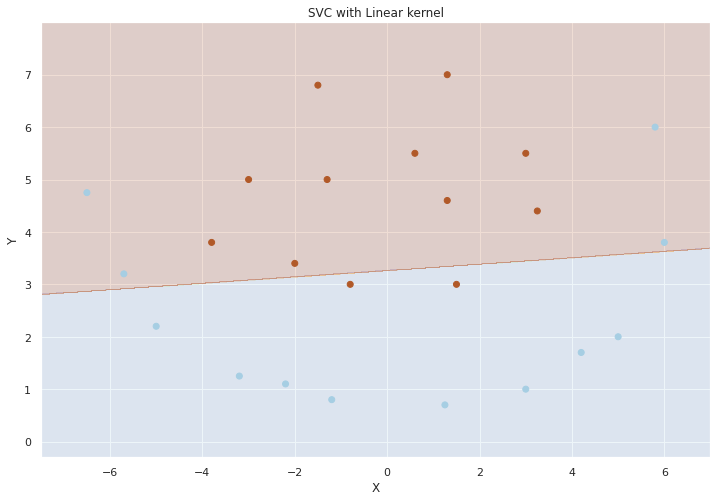

In [ ]:
svc = svm.SVC(kernel='linear').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()

- Since it is known this is not a linearly separable problem it was expected that classifications made by this kernel would be poor. It is preferable to use our additional feature to transform the data.

### sigmoid - default parameters

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



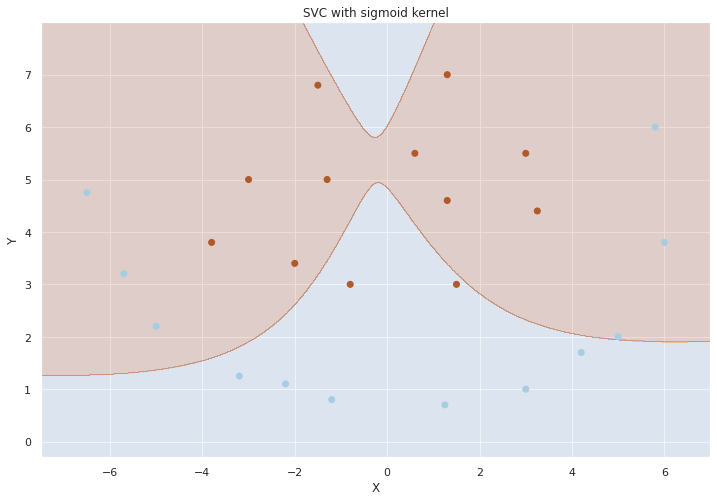

In [ ]:
svc = svm.SVC(kernel='sigmoid').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with sigmoid kernel')
plt.show()

- The sigmoid is not at all appropriate for this problem with areas of classification that even the linear kernel would've predicted better.

### polynomial - default parameters

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



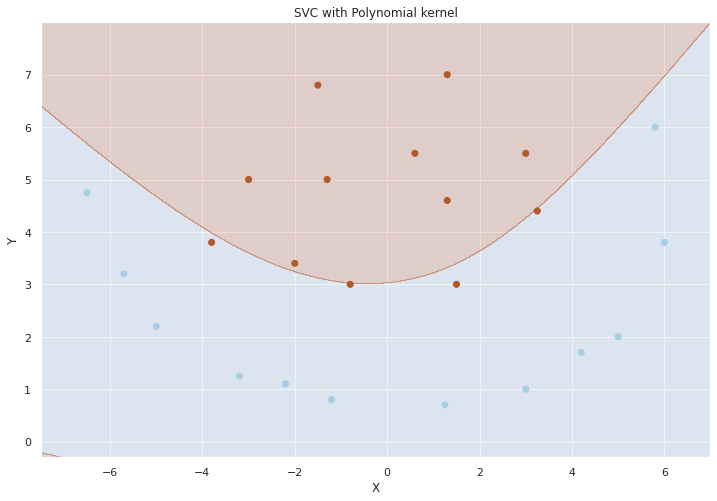

In [ ]:
svc = svm.SVC(kernel='poly').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Polynomial kernel')
plt.show()

 - The polynomial kernel fits very well with this "quadratictly" shaped data distribution of red and blue dots. With additional parameter tuning we expect the curve to fit even better to the values.

### rbf - default parameters

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



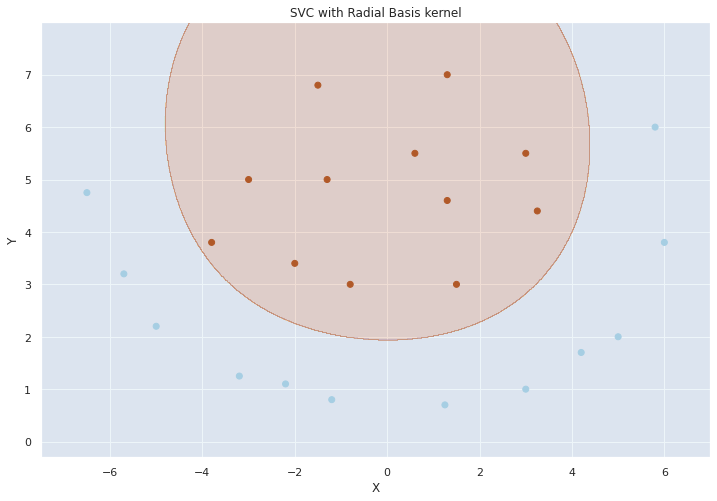

In [ ]:
svc = svm.SVC(kernel='rbf').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial Basis kernel')
plt.show()

 - This kernel type performed the best out of all we tried here, accurately classifying all instances of both classes. 

## Final Discussion

We can conclude having tried a custom made additional feature and attempting many support vector machine models with different kernels on the "points" dataset that using Radial Basis Function kernel - $k(x_{n},x_{m}) = exp({-\gamma \Vert X - X_{i} \Vert ^2\over 2\sigma^2})$ - on the Scikit's implementation of SVM that the problem is solved as optimally as possible. Potentially redoing the model tuning done on exercise 5 on these models could produce even better outcomes. 